# Purchasing Intention Prediction

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import os
import tensorflow
os.environ['KERAS_BACKEND'] = 'tensorflow'
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import metrics

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import warnings

warnings.filterwarnings("ignore")

Using TensorFlow backend.


## Import dataset

In [2]:
dataset = pd.read_csv('data/dataset.csv')

In [3]:
dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

In [5]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157213,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [6]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.reset_index(inplace = True)
X_test.reset_index(inplace = True)

## Data analysis and visualization

### Target column

Text(0.5, 1.0, 'Count of visitors based on revenue generated')

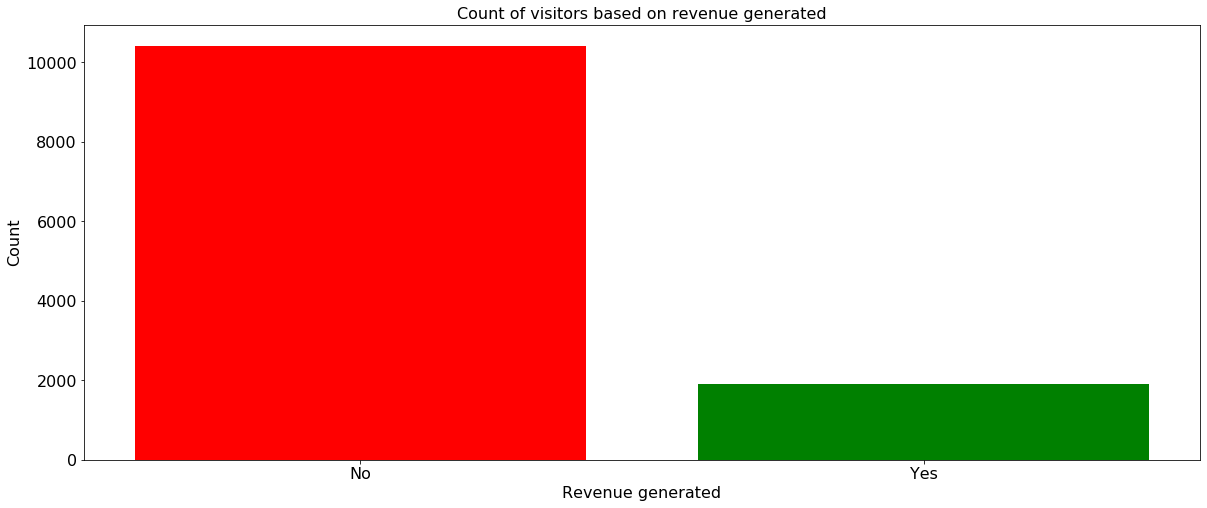

In [7]:
target_distribution = y.value_counts()

plt.figure(figsize = (20, 8))
plt.bar(target_distribution.keys().tolist(), target_distribution.tolist(), color = ['red', 'green'])

plt.xlabel('Revenue generated', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.xticks([0.0, 1.0], ['No', 'Yes'], fontsize = 16)
plt.yticks(fontsize = 16)
plt.title('Count of visitors based on revenue generated', fontsize = 16)

### Correlation matrix

In [8]:
corr = dataset.corr()
corr.style.background_gradient(cmap = 'coolwarm')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1,0.601583,0.37685,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.0989896,-0.0947776,-0.00634706,-0.0250346,-0.00548681,-0.0335607,0.0264168,0.138917
Administrative_Duration,0.601583,1,0.30271,0.238031,0.289087,0.355422,-0.14417,-0.205798,0.0676085,-0.0733037,-0.00734342,-0.0153915,-0.00556056,-0.0143764,0.0149901,0.0935867
Informational,0.37685,0.30271,1,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.0486317,-0.0482193,-0.00952667,-0.0382347,-0.0291686,-0.0344908,0.0357847,0.0952003
Informational_Duration,0.255848,0.238031,0.618955,1,0.280046,0.347364,-0.0740666,-0.105276,0.0308609,-0.0305765,-0.00957868,-0.019285,-0.0271441,-0.0246749,0.0240785,0.0703445
ProductRelated,0.431119,0.289087,0.374164,0.280046,1,0.860927,-0.204578,-0.292526,0.0562818,-0.0239582,0.00428962,-0.0131457,-0.0381218,-0.0430643,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1,-0.184541,-0.251984,0.0528231,-0.0363798,0.00297579,-0.00738044,-0.0330905,-0.0363772,0.00731061,0.152373
BounceRates,-0.223563,-0.14417,-0.116114,-0.0740666,-0.204578,-0.184541,1,0.913004,-0.119386,0.0727023,0.0238232,-0.0157722,-0.00648535,0.0782855,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1,-0.174498,0.102242,0.0145667,-0.00444236,-0.00890701,0.0786163,-0.062587,-0.207071
PageValues,0.0989896,0.0676085,0.0486317,0.0308609,0.0562818,0.0528231,-0.119386,-0.174498,1,-0.0635413,0.0185079,0.0455919,0.0113153,0.0125317,0.0120016,0.492569
SpecialDay,-0.0947776,-0.0733037,-0.0482193,-0.0305765,-0.0239582,-0.0363798,0.0727023,0.102242,-0.0635413,1,0.0126522,0.00349875,-0.016098,0.0523014,-0.0167672,-0.0823046


## Data engineering

### Remove columns

In [9]:
X_train = X_train.drop(['Administrative', 'Informational', 'ProductRelated'], axis = 1)
X_test = X_test.drop(['Administrative', 'Informational', 'ProductRelated'], axis = 1)

Remove Cols with | Correlation | < 0.2

In [10]:
X_train.drop(['OperatingSystems', 'Region', 'TrafficType'], axis = 1, inplace = True)
X_test.drop(['OperatingSystems', 'Region', 'TrafficType'], axis = 1, inplace = True)

### Encoding categorical columns

In [11]:
labelEncoder = LabelEncoder()
X_train.loc[:, 'Month'] = labelEncoder.fit_transform(X_train.loc[:, 'Month'])
X_test.loc[:, 'Month'] = labelEncoder.transform(X_test.loc[:, 'Month'])
X_train.loc[:, 'VisitorType'] = labelEncoder.fit_transform(X_train.loc[:, 'VisitorType'])
X_test.loc[:, 'VisitorType'] = labelEncoder.transform(X_test.loc[:, 'VisitorType'])
X_train.loc[:, 'Weekend'] = labelEncoder.fit_transform(X_train.loc[:, 'Weekend'])
X_test.loc[:, 'Weekend'] = labelEncoder.transform(X_test.loc[:, 'Weekend'])

Dummy Variable Creation

In [12]:
onehotencoder = OneHotEncoder(categories = 'auto', drop = 'first')
train_cat_features = onehotencoder.fit_transform(X_train.loc[:, ['Month', 'Browser', 'VisitorType']]).toarray()
train_cat_features = pd.DataFrame(train_cat_features)
test_cat_features = onehotencoder.transform(X_test.loc[:, ['Month', 'Browser', 'VisitorType']]).toarray()
test_cat_features = pd.DataFrame(test_cat_features)

X_train.drop(['Month', 'Browser', 'VisitorType'], axis = 1, inplace = True)
X_train = X_train.join(train_cat_features)
X_test.drop(['Month', 'Browser', 'VisitorType'], axis = 1, inplace = True)
X_test = X_test.join(test_cat_features)

### Scaling the data

In [13]:
standardScaler = StandardScaler()
X_train = standardScaler.fit_transform(X_train)
X_test = standardScaler.transform(X_test)

## Model generation

In [14]:
classifier = Sequential()
classifier.add(Dense(units = 128, activation = 'relu', input_dim = 32))
classifier.add(Dropout(rate = 0.6))
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dropout(rate = 0.6))
classifier.add(Dense(units = 256, activation = 'relu'))
classifier.add(Dropout(rate = 0.6))
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dropout(rate = 0.4))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.summary()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               4224      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               33024     
_____________________________________

## Training and evaluating the model

In [15]:
history = classifier.fit(X_train, y_train, epochs = 50, shuffle = False, validation_split = 0.1)

Train on 8877 samples, validate on 987 samples
Epoch 1/50
8877/8877 [==============================] - 13s 1ms/step - loss: 0.4277 - acc: 0.8409 - val_loss: 0.3347 - val_acc: 0.8663
Epoch 2/50
8877/8877 [==============================] - 2s 175us/step - loss: 0.3409 - acc: 0.8591 - val_loss: 0.2944 - val_acc: 0.8774
Epoch 3/50
8877/8877 [==============================] - 2s 176us/step - loss: 0.3113 - acc: 0.8762 - val_loss: 0.2830 - val_acc: 0.8825
Epoch 4/50
8877/8877 [==============================] - 2s 173us/step - loss: 0.2937 - acc: 0.8849 - val_loss: 0.2653 - val_acc: 0.8865
Epoch 5/50
8877/8877 [==============================] - 2s 177us/step - loss: 0.2866 - acc: 0.8885 - val_loss: 0.2717 - val_acc: 0.8794
Epoch 6/50
8877/8877 [==============================] - 2s 174us/step - loss: 0.2799 - acc: 0.8869 - val_loss: 0.2656 - val_acc: 0.8896
Epoch 7/50
8877/8877 [==============================] - 2s 186us/step - loss: 0.2785 - acc: 0.8926 - val_loss: 0.2633 - val_acc: 0.8916
Ep

### Predict Values

In [16]:
y_pred = classifier.predict(X_test)
y_pred = y_pred > 0.5

Text(0.5, 1.0, 'Count of visitors based on revenue generated')

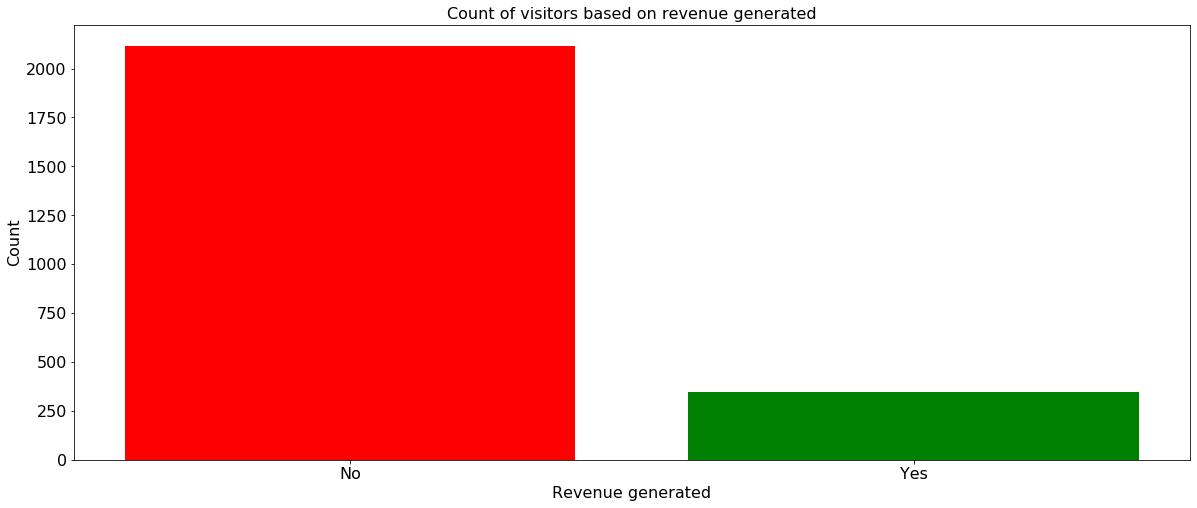

In [19]:
target_distribution = np.unique(y_pred, return_counts = True)

plt.figure(figsize = (20, 8))
plt.bar(target_distribution[0], target_distribution[1], color = ['red', 'green'])

plt.xlabel('Revenue generated', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.xticks([0.0, 1.0], ['No', 'Yes'], fontsize = 16)
plt.yticks(fontsize = 16)
plt.title('Count of visitors based on revenue generated', fontsize = 16)

In [20]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

       False       0.92      0.95      0.93      2055
        True       0.69      0.58      0.63       411

    accuracy                           0.89      2466
   macro avg       0.80      0.77      0.78      2466
weighted avg       0.88      0.89      0.88      2466



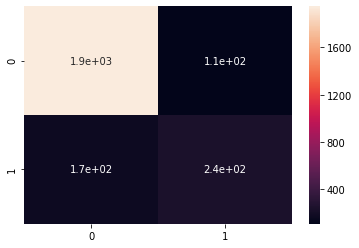

In [21]:
conf_matrix = confusion_matrix(y_test, y_pred)

import seaborn as sns

sns.heatmap(conf_matrix, annot=True)